# Observable trends
1. We can confirm the the closer cities are to the equator (Lat: 0) the higher the temp
2. There are more cities in the northern part of the world
3. Windspeeds are lower in the southern part of the world

In [ ]:
# Import dependencies
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Choose 500 random cities from the openweather city list 
file = 'city.list.json'
cities = pd.read_json(file).sample(1000)
city_names= np.array(cities['name'])



In [2]:
#get ready to make requests to open weather using wrapper
import openweathermapy.core as owm
from config import wkey
settings = {"units": "imperial", "appid": wkey}
#get the different variables and add them to an array
temp = []
humidity = []
cloudiness = []
windspeed = []
lat = []

for i in range(len(cities)): 
    try:
        current_weather = owm.get_current(city_names[i], **settings)
        temp.append(current_weather['main']['temp'])
        humidity.append(current_weather['main']['humidity'])
        cloudiness.append(current_weather['clouds']['all'])
        windspeed.append(current_weather['wind']['speed'])
        lat.append(current_weather['coord']['lat'])
    except:
        continue




In [12]:
#Create a master dataframe with all of the data
city_vars = {"Lat": lat,
             "Temp": temp,
             "Humidity": humidity,
             "Cloudiness": cloudiness,
             "Windspeed": windspeed}
city_weather = pd.DataFrame(city_vars)


#Export data to CSV
city_weather.to_csv('city_weather_data.csv')

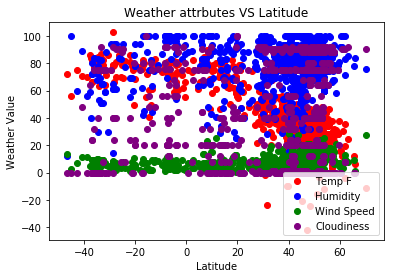

In [13]:
#mapping all attributes
plt.scatter(lat,temp,c ='r', label='Temp F')
plt.scatter(lat, humidity, c ='b', label='Humidity')
plt.scatter(lat, windspeed, c ='g', label='Wind Speed')
plt.scatter(lat, cloudiness, c = 'purple', label = 'Cloudiness')
plt.legend(loc='lower right')
plt.title('Weather attrbutes VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Weather Value')
plt.savefig('Graph_Images/all_variables.png')
plt.show()

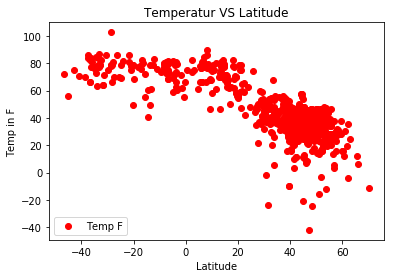

In [14]:
#Compare by temp
plt.scatter(lat,temp,c ='r', label='Temp F')
plt.legend(loc='lower left')
plt.title('Temperatur VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temp in F')
plt.savefig('Graph_Images/temp.png')
plt.show()

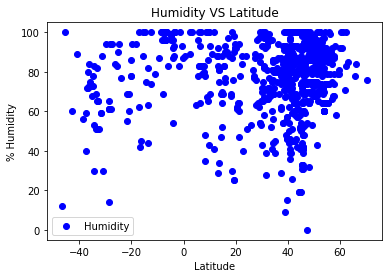

In [15]:
#Compare by humidity
plt.scatter(lat,humidity,c ='b', label='Humidity')
plt.legend(loc='lower left')
plt.title('Humidity VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('% Humidity')
plt.savefig('Graph_Images/humidity.png')
plt.show()

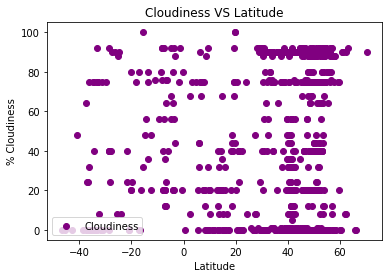

In [16]:
#Compare by Cloudiness
plt.scatter(lat,cloudiness,c ='purple', label='Cloudiness')
plt.legend(loc='lower left')
plt.title('Cloudiness VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('% Cloudiness')
plt.savefig('Graph_Images/cloudiness.png')
plt.show()

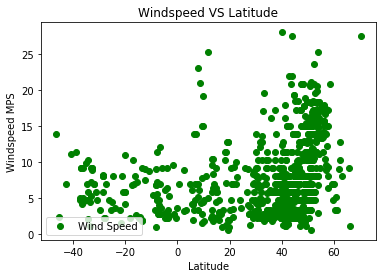

In [17]:
#Compare by Windspeed
plt.scatter(lat,windspeed,c ='g', label='Wind Speed')
plt.legend(loc='lower left')
plt.title('Windspeed VS Latitude')
plt.xlabel('Latitude')
plt.ylabel('Windspeed MPS')
plt.savefig('Graph_Images/windspeed.png')
plt.show()